<a href="https://colab.research.google.com/github/sapgreengem/ComputerVision/blob/main/Assignment_2_Cross_Validation_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 6s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
1140/1140 [==============================] - 19s 9ms/step - loss: 1.5136 - accuracy: 0.4565
Epoch 2/5
1140/1140 [==============================] - 11s 9ms/step - loss: 1.1063 - accuracy: 0.6077
Epoch 3/5
1140/1140 [==============================] - 11s 9ms/step - loss: 0.9374 - accuracy: 0.6698
Epoch 4/5
1140/1140 [==============================] - 11s 9ms/step - loss: 0.8323 - accuracy: 0.7099
Epoch 5/5
1140/1140 [==============================] - 11s 9ms/step - loss: 0.7399 - accuracy: 0.7424
Score for fold 1: loss of 0.8810901641845703; accuracy of 70.36666870117188%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
1140/1140 [==============================] - 11s 9ms/step - loss: 1.4513 - accuracy: 0.4743
Epoch 2/5
1140/1140 [=============================

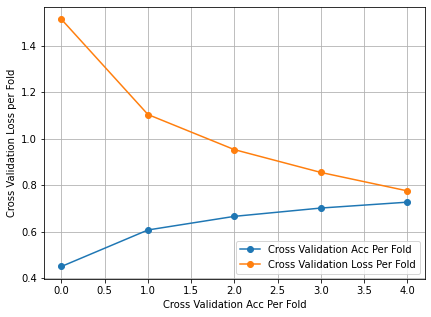

------------------------------------------------------------------------
> Fold 2 - Loss: 0.8678268194198608 - Accuracy: 70.09999752044678%


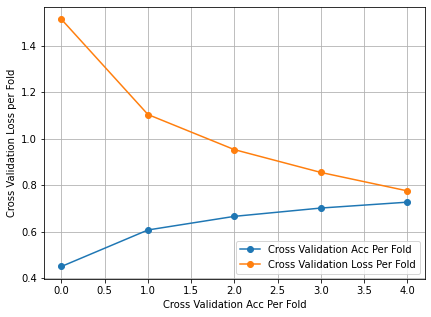

------------------------------------------------------------------------
> Fold 3 - Loss: 0.9124248623847961 - Accuracy: 68.16666722297668%


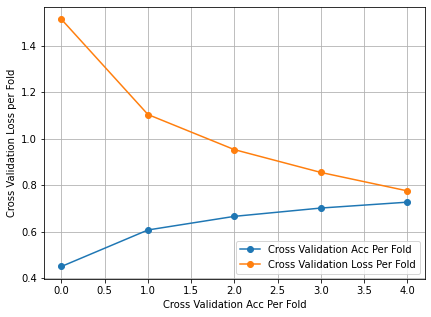

------------------------------------------------------------------------
> Fold 4 - Loss: 0.9473710060119629 - Accuracy: 66.43333435058594%


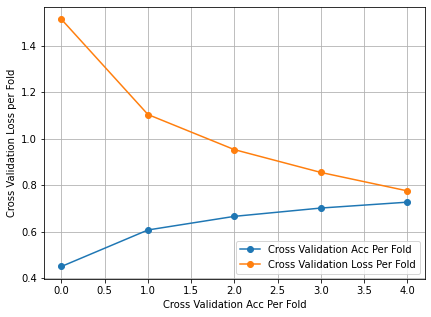

------------------------------------------------------------------------
> Fold 5 - Loss: 0.9154933094978333 - Accuracy: 67.86666512489319%


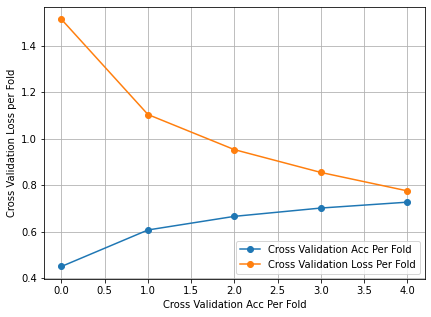

------------------------------------------------------------------------
> Fold 6 - Loss: 1.0820256471633911 - Accuracy: 62.23333477973938%


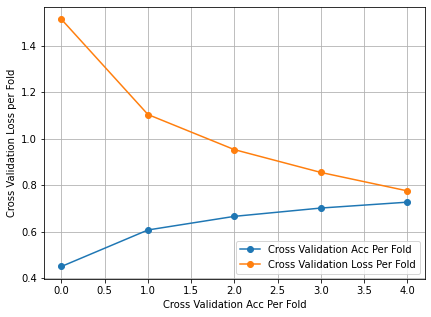

------------------------------------------------------------------------
> Fold 7 - Loss: 0.9508014917373657 - Accuracy: 66.90000295639038%


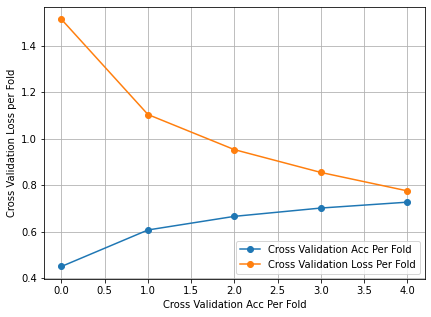

------------------------------------------------------------------------
> Fold 8 - Loss: 0.9163311123847961 - Accuracy: 68.46666932106018%


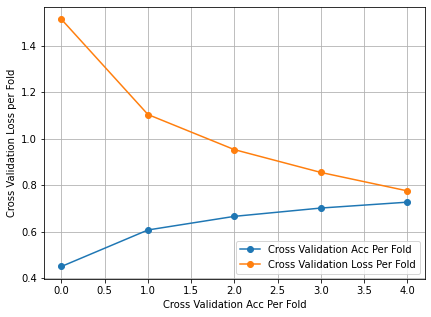

------------------------------------------------------------------------
> Fold 9 - Loss: 1.01233971118927 - Accuracy: 64.66666460037231%


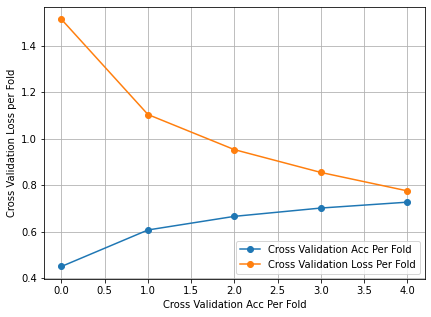

------------------------------------------------------------------------
> Fold 10 - Loss: 0.9368239045143127 - Accuracy: 67.33333468437195%


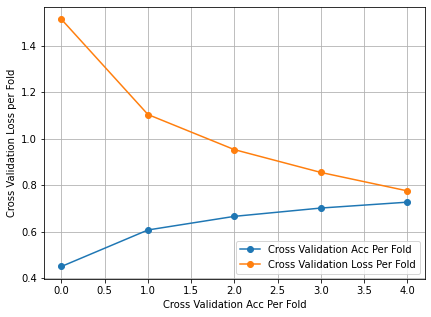

------------------------------------------------------------------------
> Fold 11 - Loss: 1.0297462940216064 - Accuracy: 64.83333110809326%


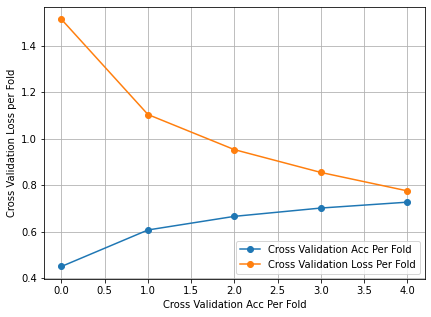

------------------------------------------------------------------------
> Fold 12 - Loss: 0.9208076000213623 - Accuracy: 68.00000071525574%


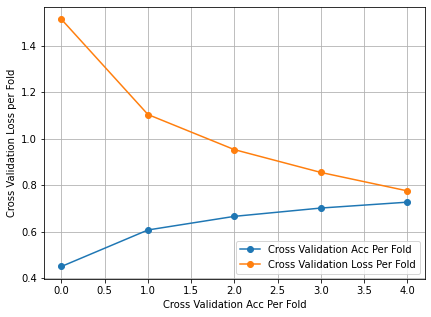

------------------------------------------------------------------------
> Fold 13 - Loss: 0.8909609317779541 - Accuracy: 68.53333115577698%


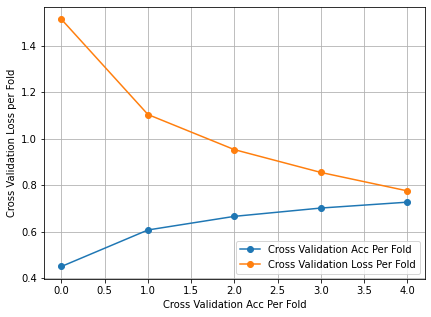

------------------------------------------------------------------------
> Fold 14 - Loss: 0.8707817196846008 - Accuracy: 70.49999833106995%


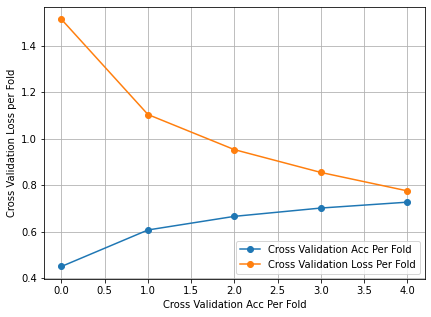

------------------------------------------------------------------------
> Fold 15 - Loss: 0.9400068521499634 - Accuracy: 66.43333435058594%


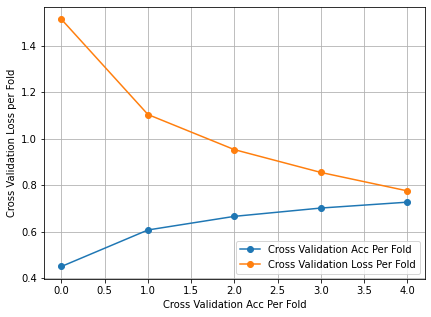

------------------------------------------------------------------------
> Fold 16 - Loss: 0.9461386799812317 - Accuracy: 67.96666383743286%


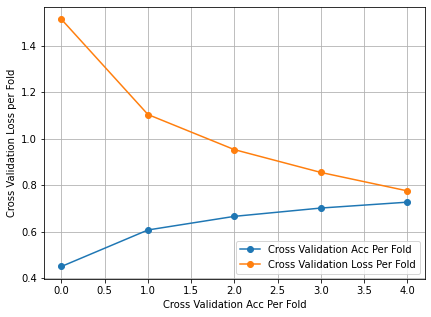

------------------------------------------------------------------------
> Fold 17 - Loss: 0.9160273671150208 - Accuracy: 68.59999895095825%


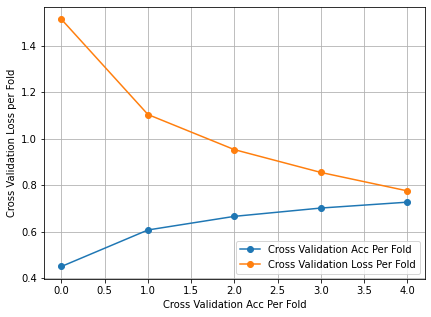

------------------------------------------------------------------------
> Fold 18 - Loss: 0.9384267330169678 - Accuracy: 67.76666641235352%


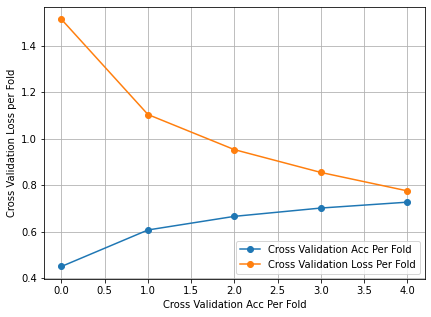

------------------------------------------------------------------------
> Fold 19 - Loss: 0.9052251577377319 - Accuracy: 68.50000023841858%


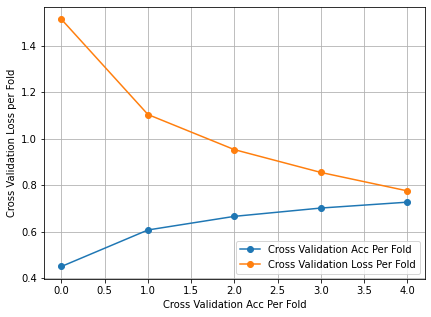

------------------------------------------------------------------------
> Fold 20 - Loss: 0.9177555441856384 - Accuracy: 68.66666674613953%


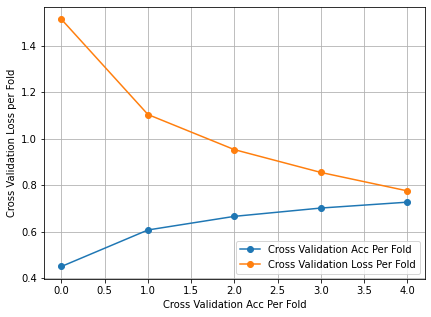

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 67.61666655540466 (+- 1.948546284828919)
> Loss: 0.9349202454090119
------------------------------------------------------------------------


In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 5
optimizer = Adam()
verbosity = 1
num_folds = 20

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], 'o-', label='Cross Validation Acc Per Fold')
  plt.plot(history.history['loss'], 'o-', label = 'Cross Validation Loss Per Fold')
  plt.xlabel('Cross Validation Acc Per Fold')
  plt.ylabel('Cross Validation Loss per Fold')
  plt.grid(True)
  plt.legend(loc='lower right')
  plt.show() 
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')